# Pengolahan Citra Digital - Introduction

# *Basic Operation of Digital Image Processing*


Di bawah ini saya akan menjabarkan beberapa hal yang menjadi operasi dasar pada pengolahan citra digital. Yang perlu diperhatikan adalah saya menggunakan bahasa pemograman python dengan library yang digunakan adalah sebagai berikut:
1. OpenCV = digunakan hampir pada seluruh proses DIP dan comvis
2. numpy = library khusus untuk menghitung operasi matriks
3. Matplotlib = digunakan untuk plotting


Mohon diperhatikan, *requirement* diatas itu hanya untuk menunjang pada pembelajaran ini. Bisa eksplor ke yang lain dan ga selalu dibatasi dengan keterangan diatas.

<img src="./Asset/diagram_1_modelling.PNG" alt="Modelling" title="Modelling" />

Kalau dilihat dari diagram diatas, pengolahan citra (*image processing*) melakukan *enhancement* kepada citra, seperti contohnya merubah *color channel*, *blur, sharpening, dilation, sampling (resize), quantization*, mengambil informasi berupa histogram dan lain-lain. 

Sedangkan untuk *computer vision* lebih berfokus mendapatkan informasi dari citra, seperti objek apa yang ada pada citra, lokasinya pada citra, membedakan *impostor* atau *genuine* dan lain-lain

Untuk *computer graphics* proses yang dilakukan adalah melakukan visualisasi dari model menjadi sebuah citra

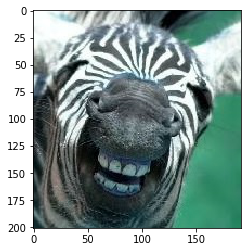

In [3]:
import cv2 # Library opencv
import matplotlib.pyplot as plt 
# digunakan untuk menampilkan citra pada jupyter notebook 

img = cv2.imread("Asset/gambar.jpg") # Ini gambar favorit saya!
# Pada program python biasa, bisa menggunakan: 
# cv2.imshow("judul", variabel_citra)
plt.imshow(img)
plt.show()
# Oh ada yang aneh dengan citra ini, apa ya?

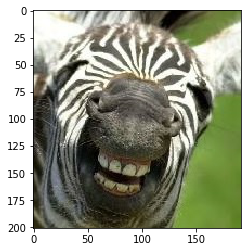

In [8]:
import matplotlib.image as mpimg
%matplotlib inline

im = mpimg.imread("Asset/gambar.jpg")
plt.imshow(im)

In [8]:
# Opencv
print(img.shape) # dimensi dari citra (y,x, channel)
img[0,0]
# variabel_citra [y, x, channel]

(201, 192, 3)


array([255, 253, 253], dtype=uint8)

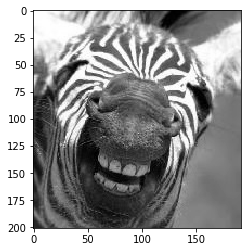

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Untuk menampilkan citra abu-abu, 
# cmap atau color mapping pada matplotlib perlu diganti
plt.imshow(gray_img,cmap='gray')

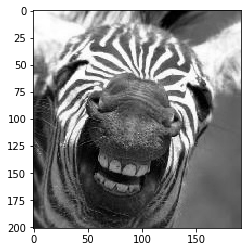

In [9]:
plt.gray()
im = im.mean(axis=2)
plt.imshow(im)

RGB/BGR $\leftrightarrow$ grayscale (cv2.COLOR_BGR2GRAY, cv2.COLOR_RGB2GRAY, cv2.COLOR_GRAY2BGR, cv2.COLOR_GRAY2RGB).

RGB[A] ke GRAY: 
$ Y \leftarrow 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B $

dan GRAY ke RGB[A]: 
$R \leftarrow Y, G \leftarrow Y, B \leftarrow Y, A \leftarrow max(ChannelRange)$

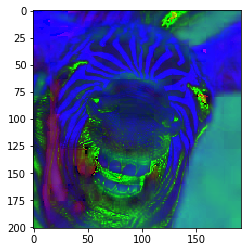

In [12]:
# Hue, Saturation, Value
# Blue, Green, Red
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)
plt.show()

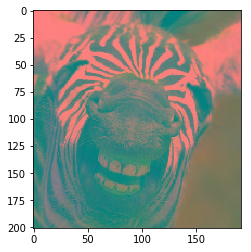

In [13]:
# Y-Cr-Cb
YCrCb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
plt.imshow(YCrCb_img)
plt.show()

In [15]:
gray_img

array([[253, 253, 254, ..., 115, 112, 110],
       [253, 253, 254, ..., 118, 115, 112],
       [253, 254, 254, ..., 123, 121, 116],
       ...,
       [ 41,  39,  38, ..., 110, 111, 111],
       [ 44,  41,  38, ..., 111, 111, 111],
       [ 44,  42,  38, ..., 110, 110, 111]], dtype=uint8)

In [16]:
print("Jumlah pixel",img.size) # Untuk mendapatkan jumlah pixel pada citra
print("Bentuk citra", img.shape, "\nCitra abu-abu", gray_img.shape)
# Apa perbedaan dari kedua keluaran tersebut? 
print("Tipe data", type(img)," tipe data citra", img.dtype) 
# Bisa dijelaskan apakah perbedaan dari tipe data dengan tipe data citra?
print("Color space", img[0,0]) 

Jumlah pixel 115776
Bentuk citra (201, 192, 3) 
Citra abu-abu (201, 192)
Tipe data <class 'numpy.ndarray'>  tipe data citra uint8
Color space [255 253 253]


In [17]:
b, g, r = cv2.split(img)
print("Memisahkan color channel [b, g, r]", b.shape, g.shape, r.shape)
img_merge = cv2.merge((b,g,r))
print("Menggabungkan color channel", img_merge.shape)
# Dapat juga menggunakan akses langsung seperti img[:,:,i] dimana i = 0,1,2
# sesuai urutan pada color channelnya

Memisahkan color channel [b, g, r] (201, 192) (201, 192) (201, 192)
Menggabungkan color channel (201, 192, 3)


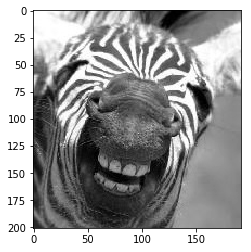

In [24]:
plt.imshow(g) #tidak bisa tampil warna karena defaultnya abu-abu.

# SESI TANYA JAWAB

Pertanyaan:
1. kenapa kalau lihat tutorial opencv, selalu disaranin pake *environment* baru ? OpenCV itu bisa di *combine* dengan *library* lain jadi kadang buat *environment* sendiri. Kalau saya mah cuma install biasa aja wkwkwk
2. btw td yg warna diubah2 jd bgr, hsv, grayscale itu untuk apanya bang atau latihan cara ubahnya aja bang? Oke, singkat kata aja, channel warna itu ada beragam jenis dengan kebutuhannya masing-masing. Dan tentu aja, ngerubah channel warna bisa menghasilkan informasi yang lain